# Final Project Notebook - Spring 2024

In [12]:
import matplotlib.pyplot as plt # setting up for image inputs
import imageio
import torch
import torchvision
from torchvision import models, transforms
import numpy as np
from torchvision.models import *
from PIL import Image
import requests
from torchvision import models
from torchsummary import summary

In [13]:
def plot(x): # create plot
    fig, ax = plt.subplots() # create plot
    im = ax.imshow(x,cmap='gray') # create image X
    ax.axis('off') # turn of ax
    fig.set_size_inches(20, 20) # set size 20x20
    plt.show() # show the plot

In [14]:
im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')

<ipython-input-14-2086ec9e0cf6>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/imageio_banner.png')


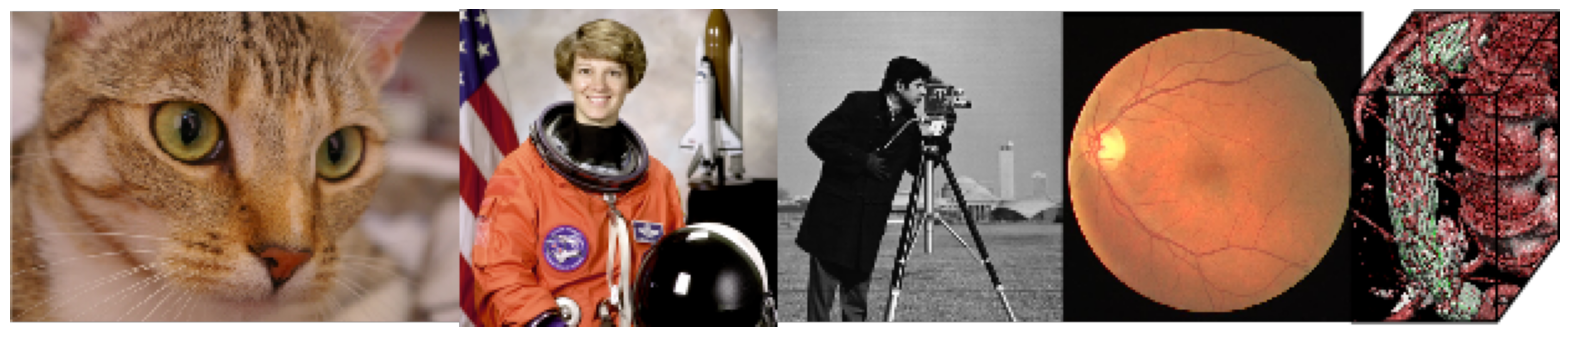

In [15]:
plot(im) # plot

In [16]:
net = alexnet(pretrained=True).cuda(0) # move model to a gpu

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 101MB/s] 


In [17]:
normalize = transforms.Normalize( # Define the mean and standard deviation for normalizing the image
   mean=[0.485, 0.456, 0.406], # mean values for rgb
   std=[0.229, 0.224, 0.225] # std value for rgb
)
preprocess = transforms.Compose([ # sequence transformation
   transforms.Resize(256), # image size
   transforms.CenterCrop(224), # image size
   transforms.ToTensor(), # transform image
   normalize # normalize
])

In [18]:
im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg') # image

<ipython-input-18-772805ffc2cf>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('https://www.medicalnewstoday.com/content/images/articles/322/322868/golden-retriever-puppy.jpg')


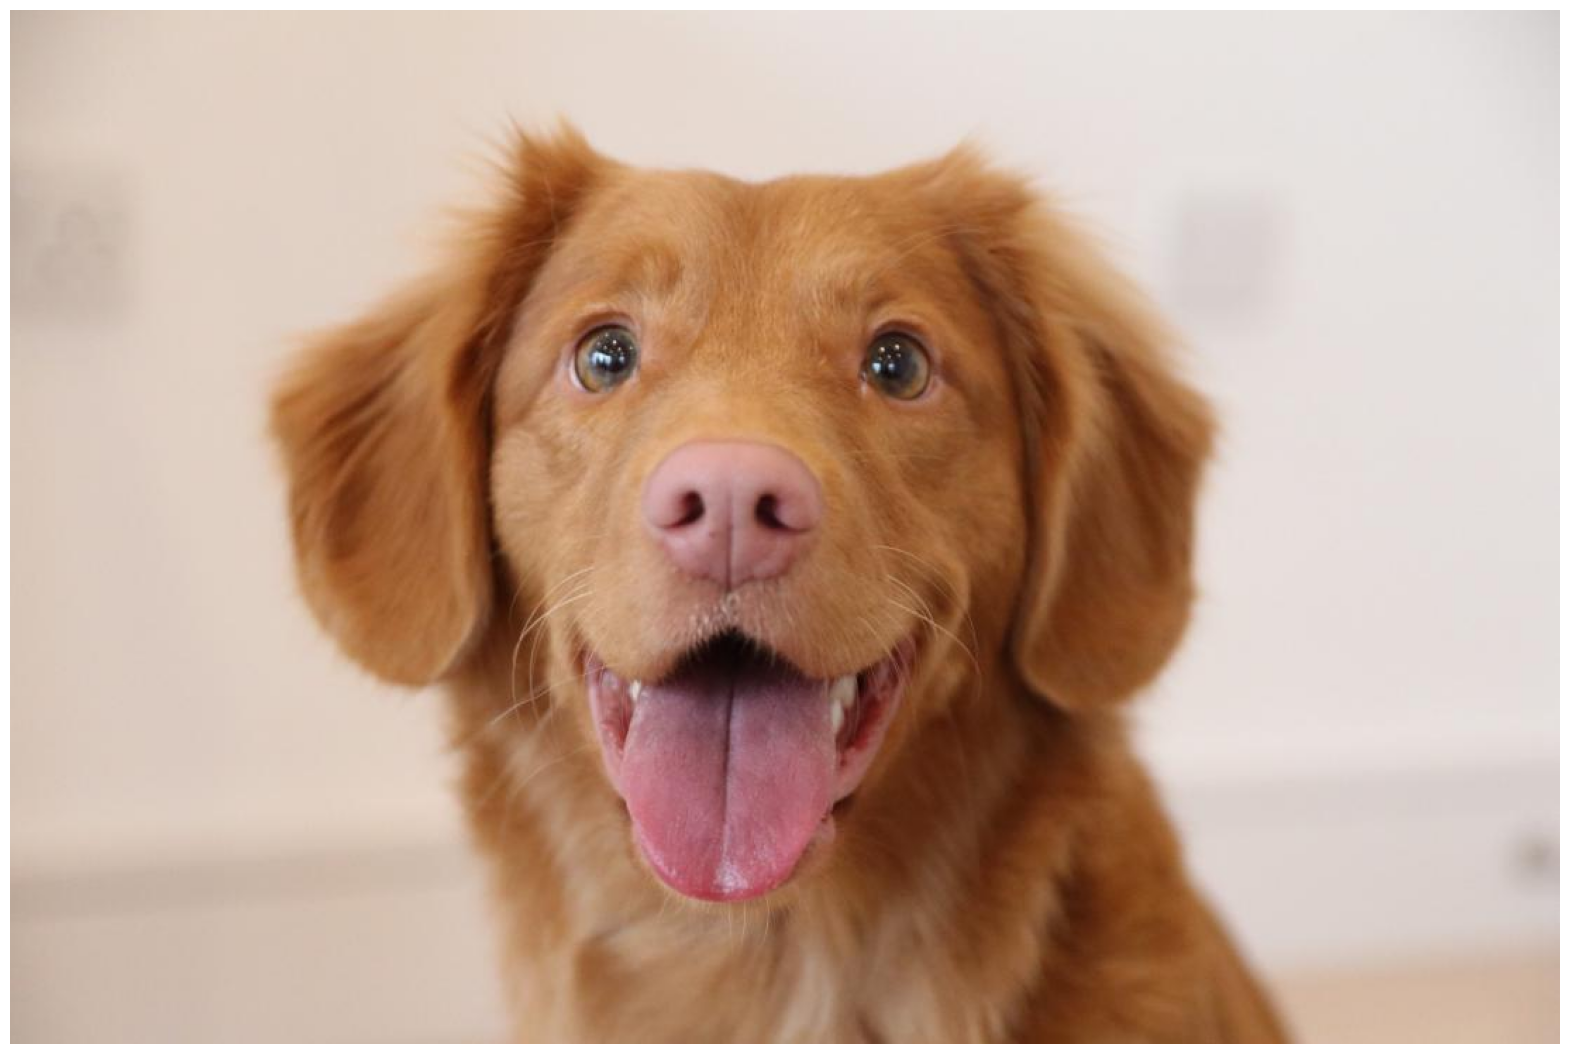

In [19]:
plot(im)

In [20]:
image = Image.fromarray(im) #convert to pil

In [21]:
img_tensor = preprocess(image) # tensor image

In [22]:
img_tensor = img_tensor.unsqueeze_(0) # tensor image

In [23]:
img_tensor.shape # tensor shape

torch.Size([1, 3, 224, 224])

In [24]:
img_variable = torch.tensor(img_tensor).cuda(0)

<ipython-input-24-a3c4eb55103d>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


In [25]:
out = net(img_variable) # image out

In [26]:
label_index = out.cpu().data.numpy().argmax() # label

In [27]:
label_index # label

220

In [28]:
top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:]) # convert tensor out

In [29]:
LABELS_URL = 'https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json' # label

In [52]:
labels = {int(key):value for (key, value) in requests.get(LABELS_URL).json().items()} # convert in labels

In [31]:
print(labels[label_index]) # print labels

Sussex spaniel


In [32]:
for i in range(10):
    print(labels[top_list[i]]) # print labels

Sussex spaniel
golden retriever
Irish setter, red setter
tennis ball
Brittany spaniel
cocker spaniel, English cocker spaniel, cocker
Tibetan mastiff
chow, chow chow
vizsla, Hungarian pointer
clumber, clumber spaniel


In [33]:
net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [34]:
summary(net, (3, 224, 224)) # summary

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [35]:
out = net.features[0](img_variable).cpu().detach().numpy()

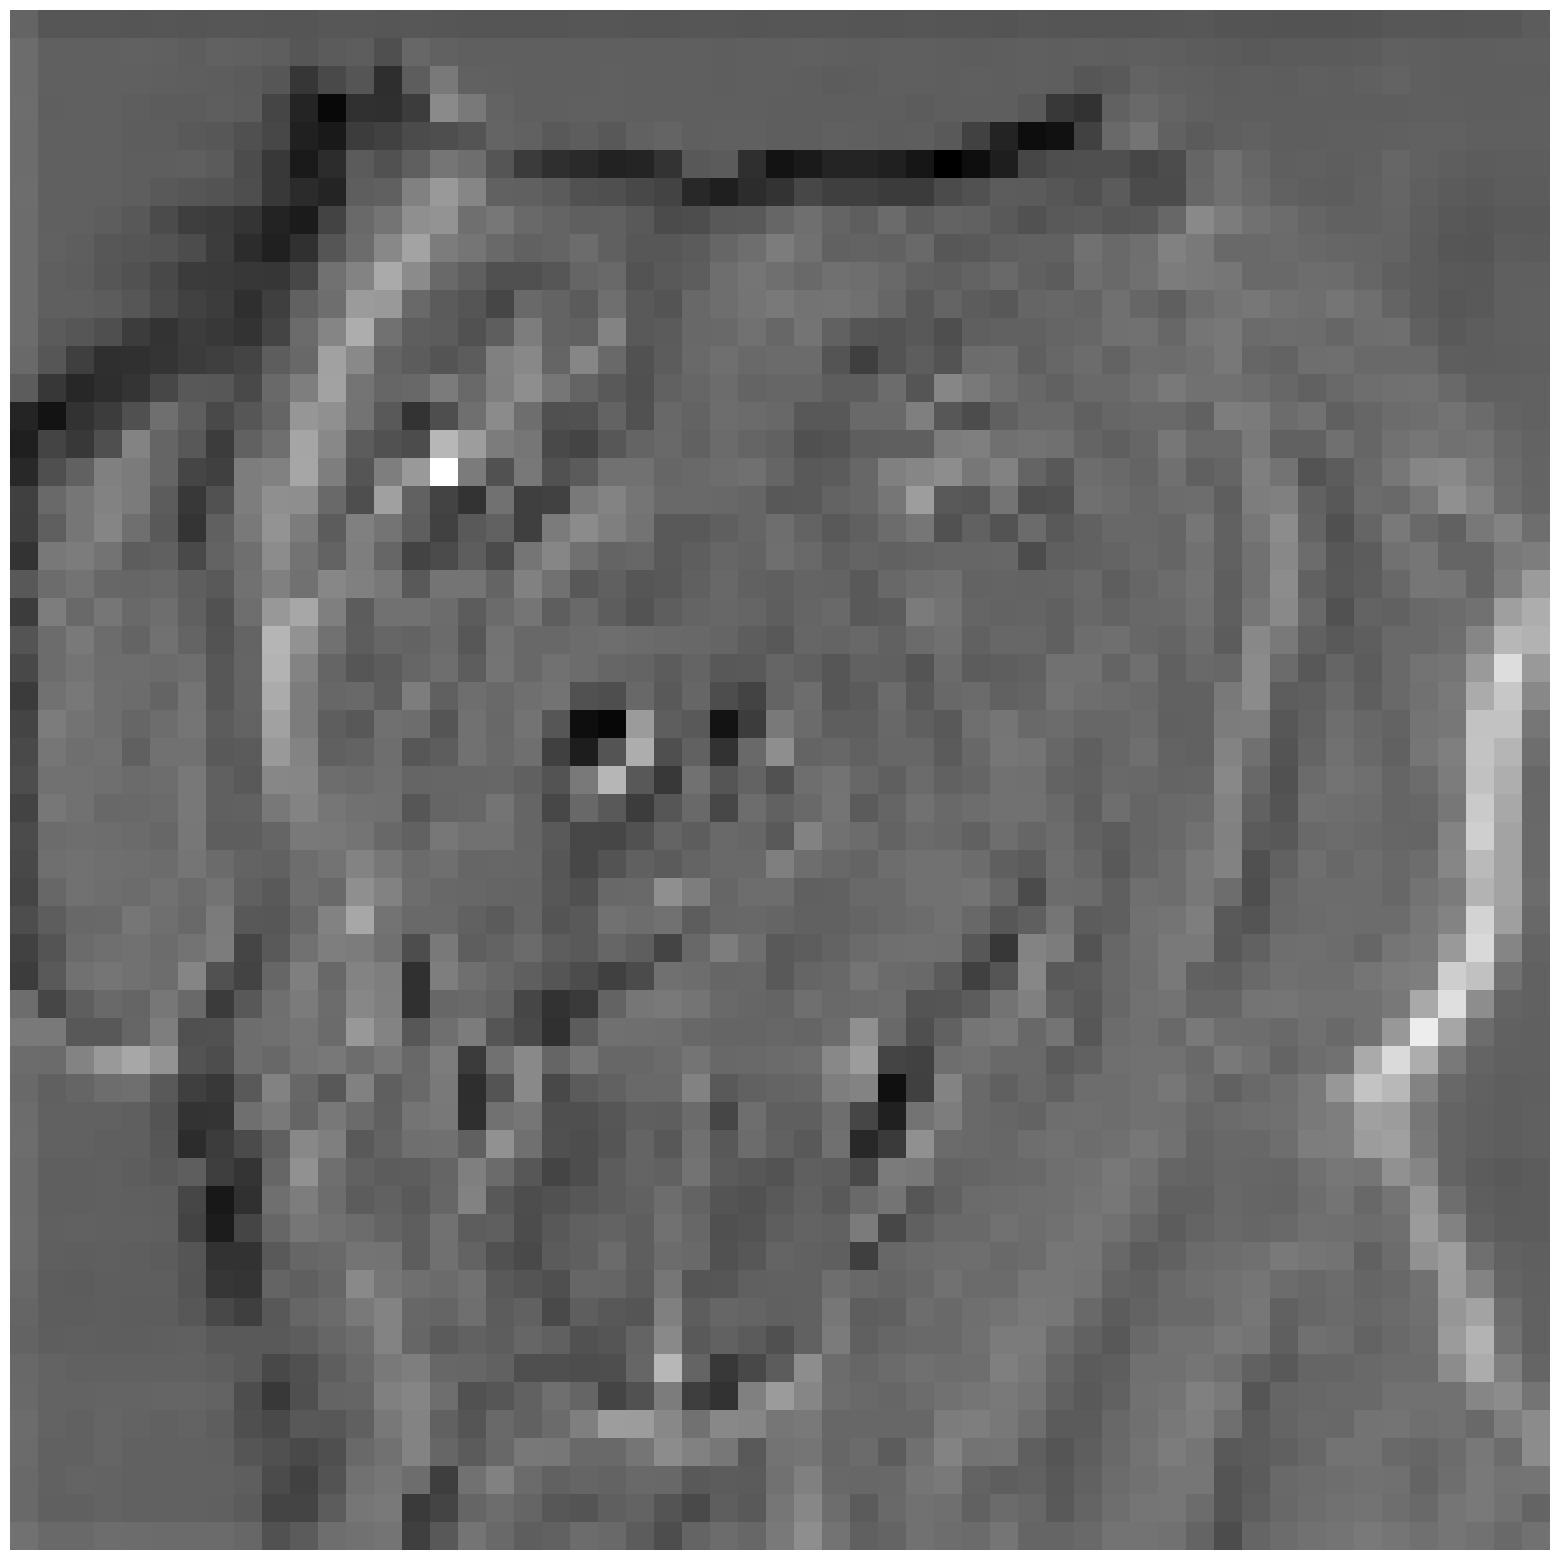

In [36]:
plot(out[0,0,:,:]) # plot

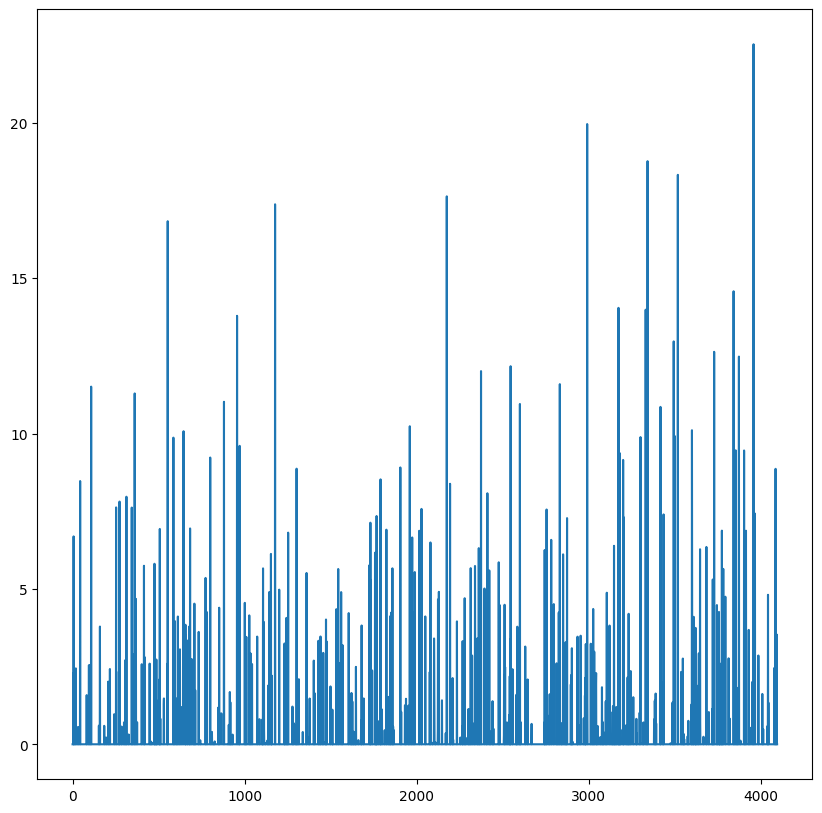

In [37]:
plt.plot(np.arange(4096),net.classifier[0:6](net.avgpool(net.features[0:13](img_variable)).flatten()).cpu().detach().numpy())
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [38]:
im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')

<ipython-input-38-db4016f420a5>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('http://bocasurfcam.com/most_recent_image.php')


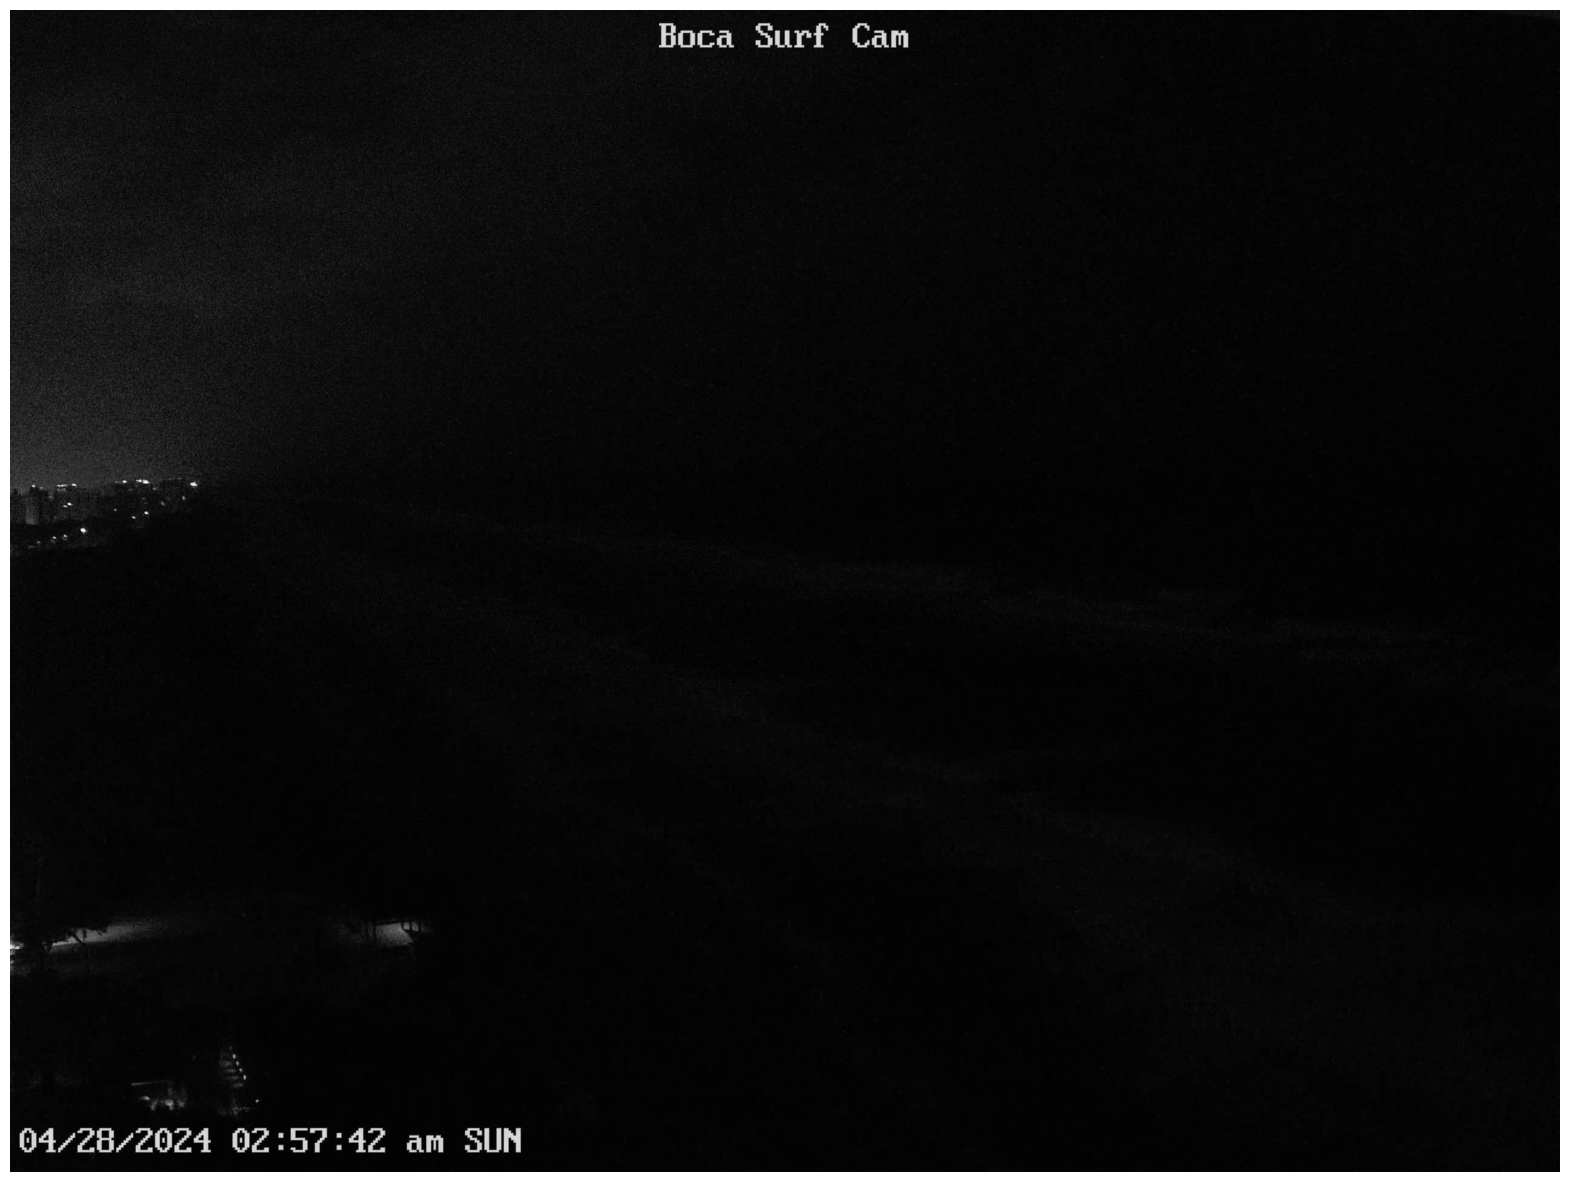

In [39]:
plot(im)

In [40]:
def load_im(im):
    image = Image.fromarray(im) #convert to pil
    img_tensor = preprocess(image)
    img_tensor = img_tensor.unsqueeze_(0)
    img_variable = torch.tensor(img_tensor).cuda(0)
    return img_variable

In [41]:
out = net(load_im(im))

<ipython-input-40-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


In [42]:
def inference(im):
    out = net(load_im(im))
    label_index = out.cpu().data.numpy().argmax()
    top_list = np.flip(np.argsort(out.cpu().data.numpy())[0][-10:])
    print(labels[label_index])
    print('____')
    for i in range(10):
        print(labels[top_list[i]])

In [43]:
inference(im)

digital clock
____
digital clock
matchstick
nematode, nematode worm, roundworm
spotlight, spot
microphone, mike
lighter, light, igniter, ignitor
candle, taper, wax light
jack-o'-lantern
mortar
theater curtain, theatre curtain


<ipython-input-40-4f8a3494e1c8>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_variable = torch.tensor(img_tensor).cuda(0)


# Restart Notebook (Disconnect and Delete Runtime) Before Running Next Section

# Custom Data Deck

In [44]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [45]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [46]:
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

In [47]:
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [48]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

In [49]:
model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [50]:
url = "https://docs.google.com/presentation/d/1E1yMswjixgHyzh9HGc4ilz7DntT8oB5qiJ7romGazuY/edit?usp=sharing"

In [51]:
images.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
model(images)

In [ ]:
y = model(images)

In [ ]:
y.shape

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
for i in list(guesses):
    print(labels[i])

In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y

In [ ]:
X = y.detach().cpu().numpy()

In [ ]:
X.shape

In [ ]:
plt.plot(X[0],'.')

In [ ]:
X[0]

In [ ]:
np.argmax(X[0])

In [ ]:
labels[948]

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [ ]:
for i in top_ten:
    print(labels[i])

In [ ]:
labels

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():

    acc_train = acc(model(x,w),y)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 4
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    wb.log({"loss": loss})

    make_plots()
